# CSCI E-25      
## Independent Project - Fashion Classifier
### Alonzo Machiraju

## Introduction   

This project aims to classify photos of pieces of clothing and analyze their colors, patterns and textures.

The first stage requires importing all relevant packages

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.12.0


Having verified our TensorFlow version, we can now load the Fashion-MNIST dataset, build a classifer, and train it.

In [3]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

We have ten classes in the dataset. However, the names are not stored in the dataset, but instead correspond to a numerical label 0-9.

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Before building and training our classifier, we must explore the data.

In [6]:
train_images.shape

(60000, 28, 28)

Our training data consists of 60,000 images of 28x28 pixels.

In [7]:
test_images.shape

(10000, 28, 28)

Our test set is much smaller, containing 10,000 images of 28x28 pixels. We will now view a small sample of our fashion images for both our train and test data:

Training Images:


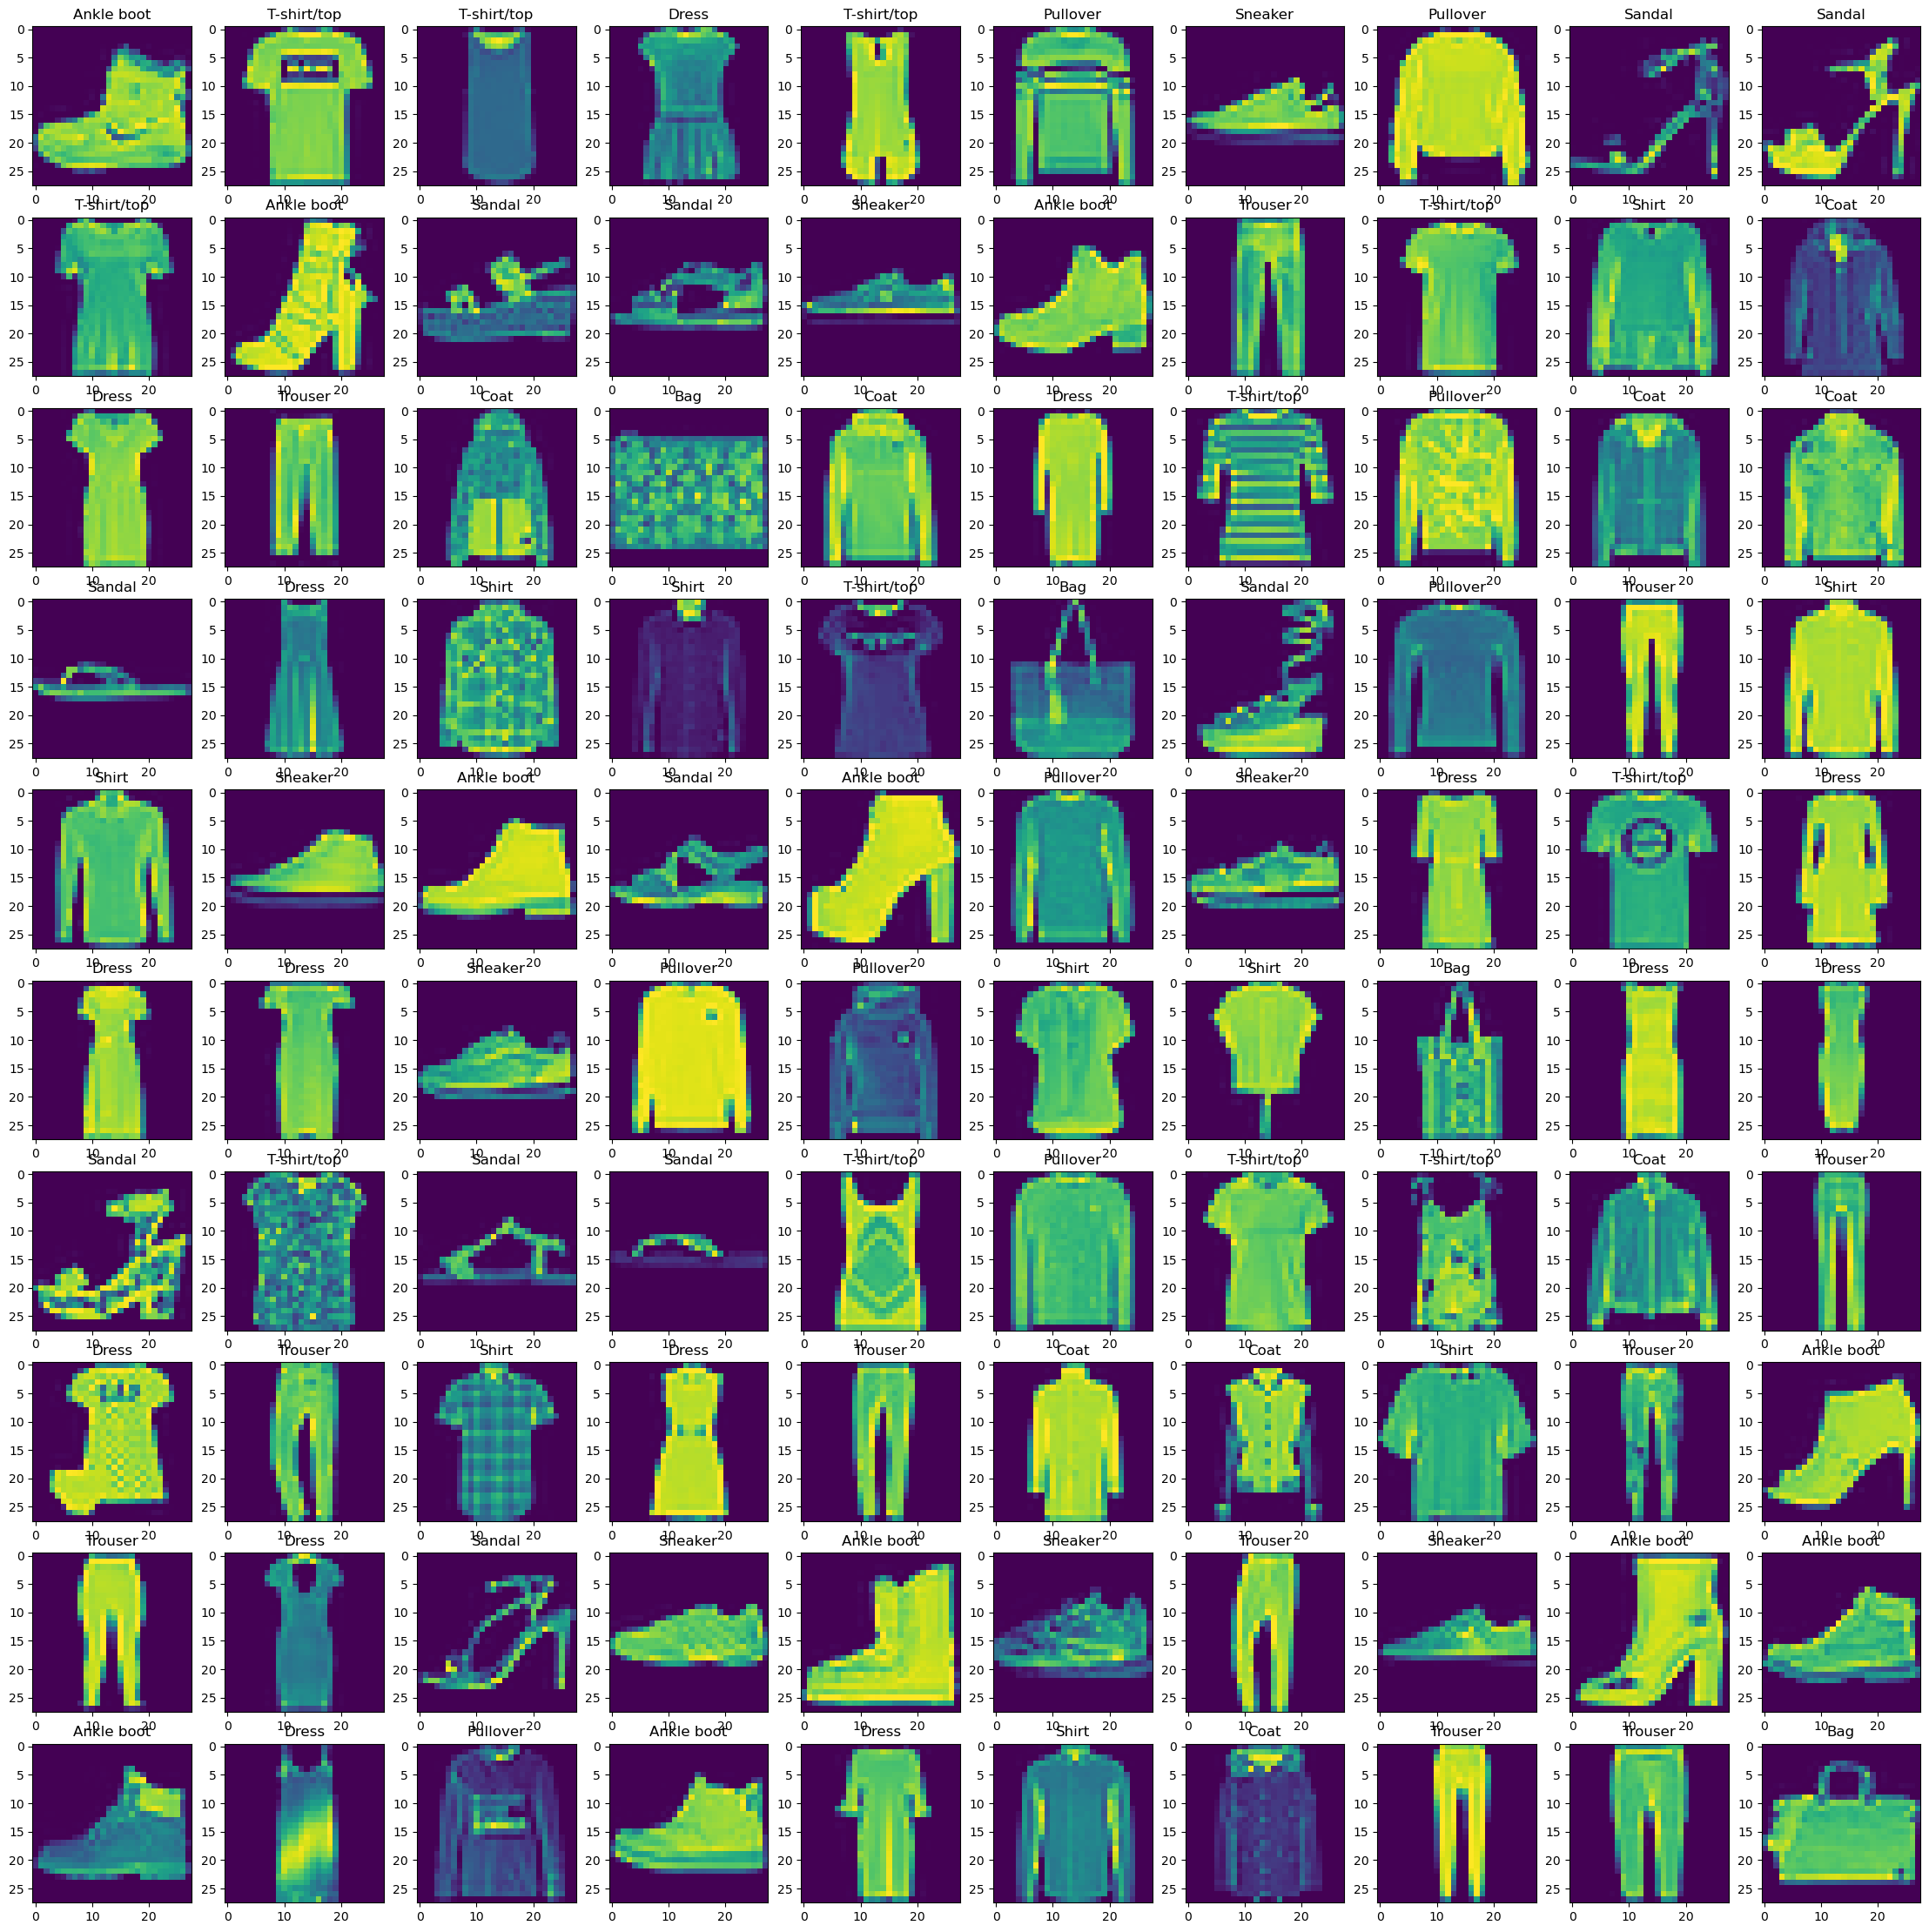

In [8]:
fig, ax = plt.subplots(10, 10, figsize=(28,28))
ax = ax.flatten()

print("Training Images:")

for i in range(0, 100):
        img = train_images[i]
        if img is None:
            continue
            
        label = class_names[train_labels[i]]
        ax[i].imshow(img)
        ax[i].set_title(label)

Test Images:


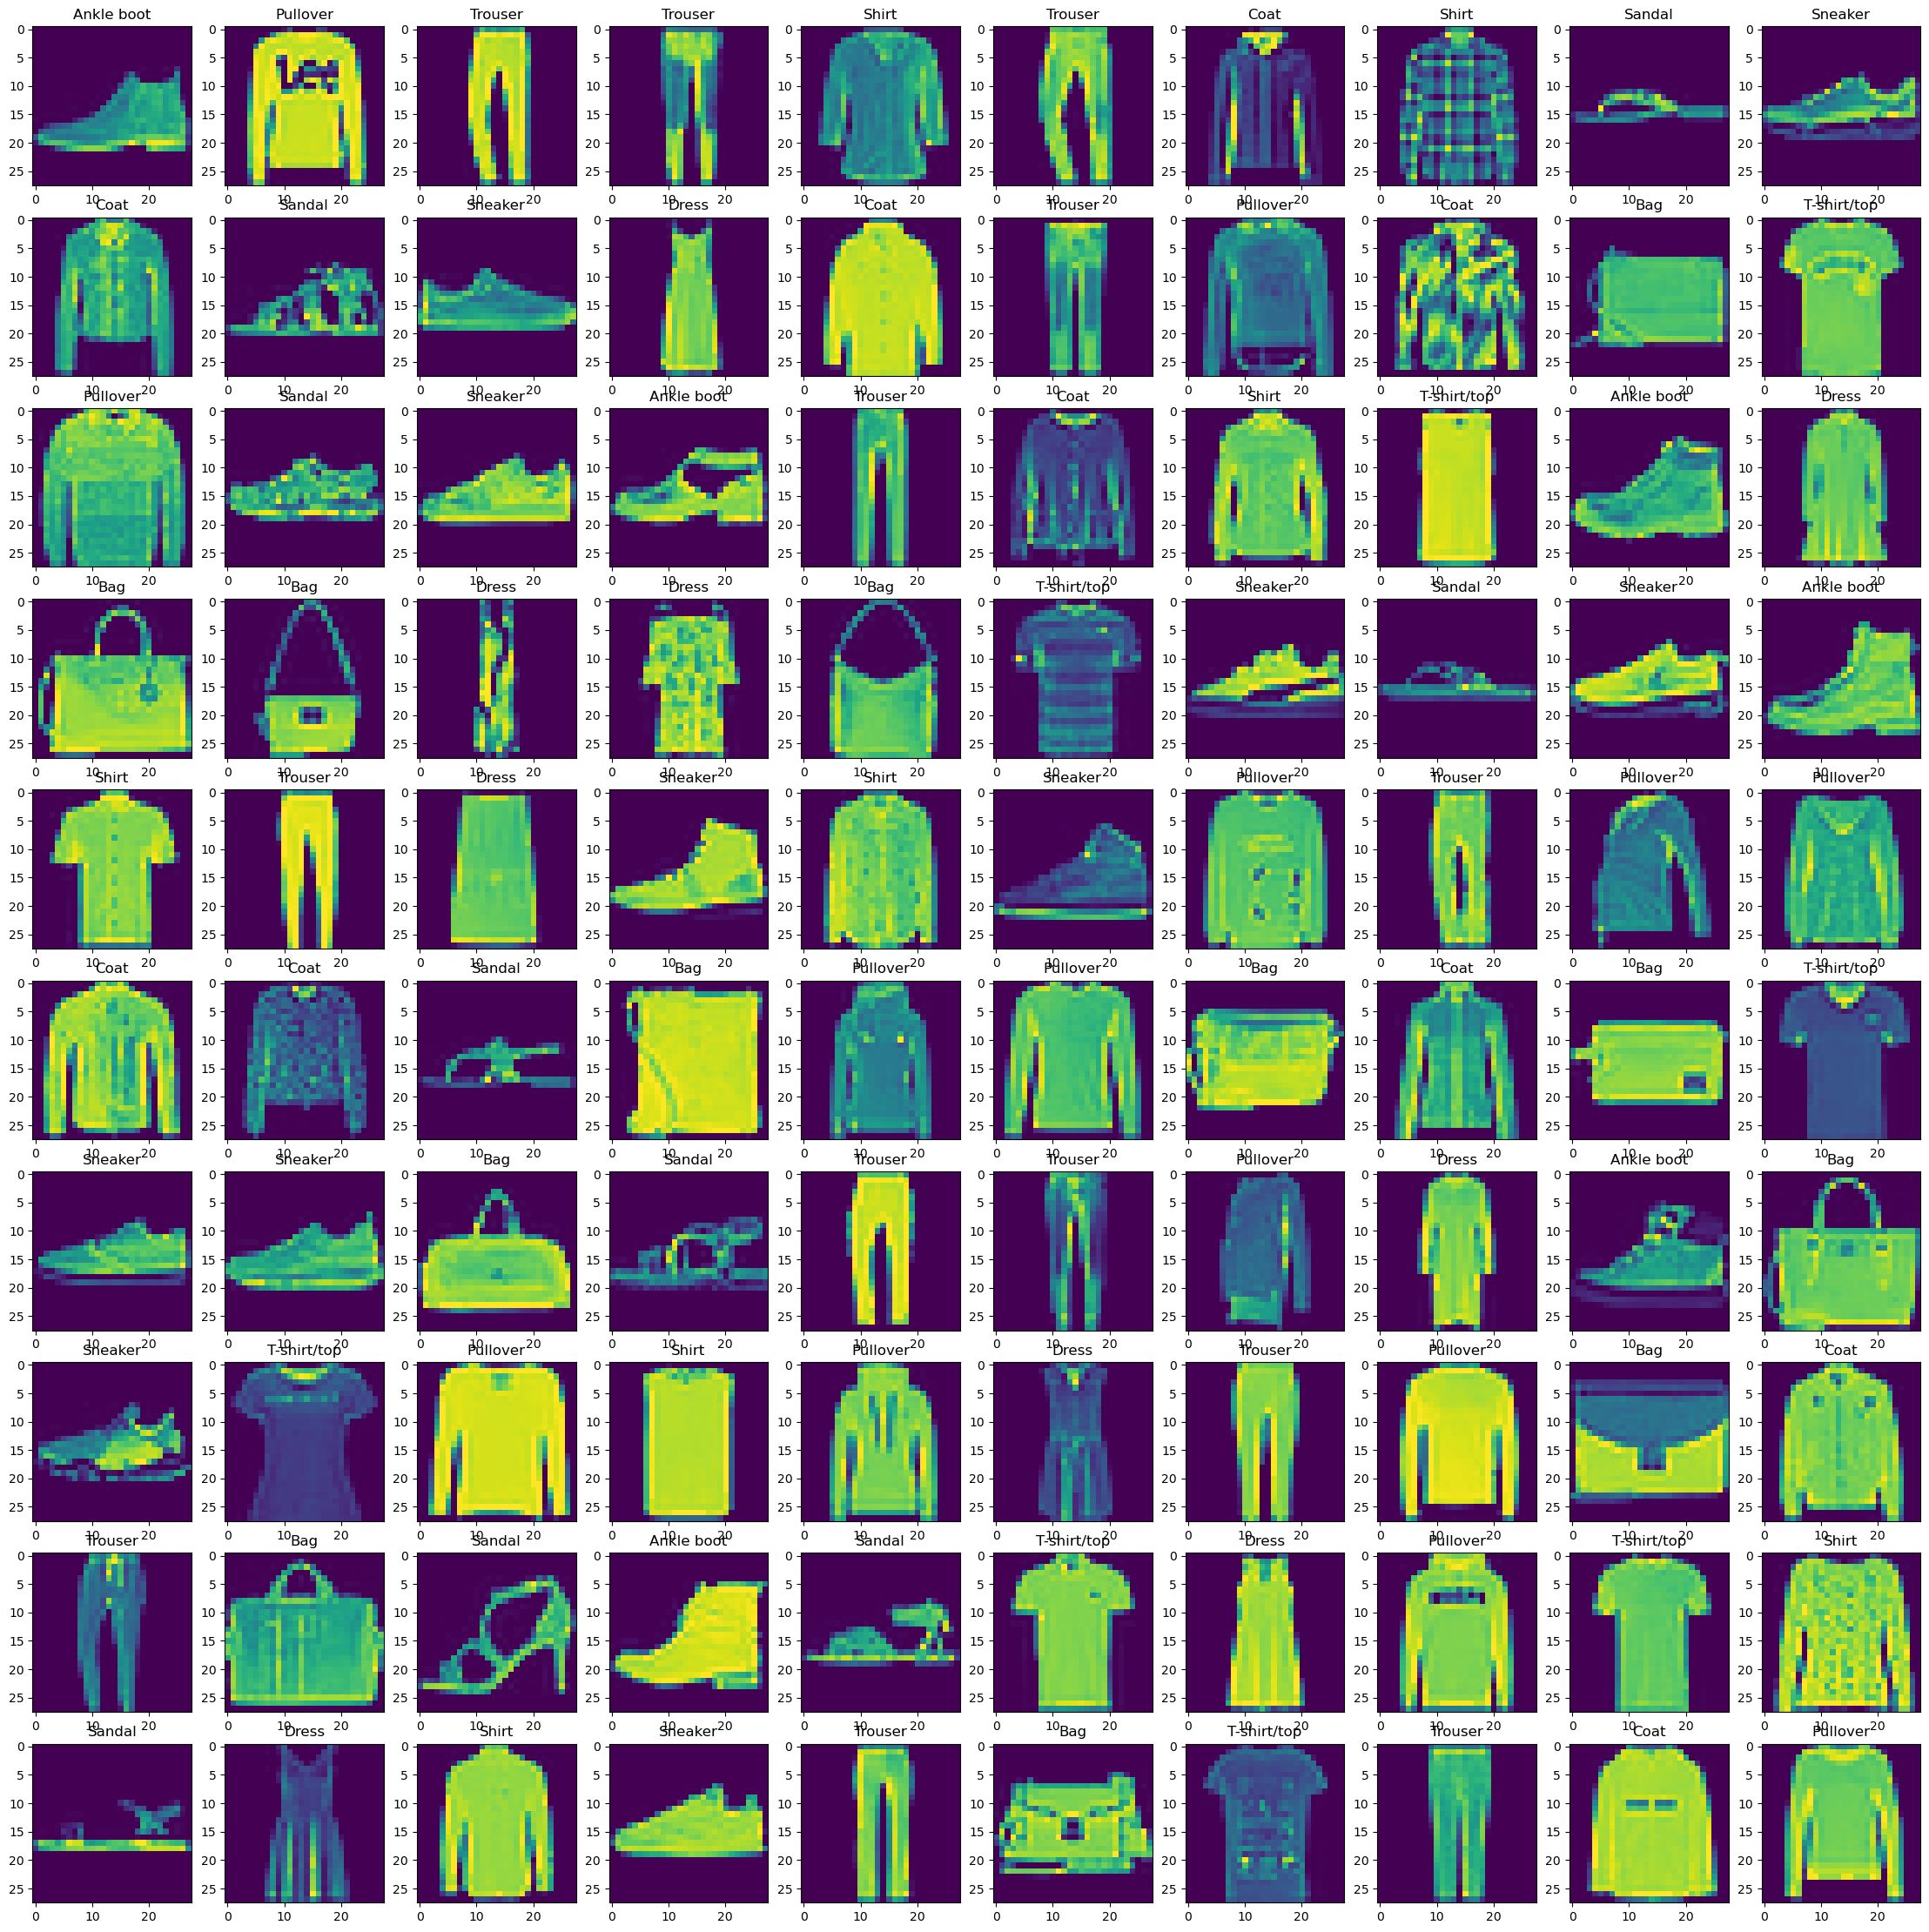

In [9]:
fig, ax = plt.subplots(10, 10, figsize=(28,28))
ax = ax.flatten()

print("Test Images:")

for i in range(0, 100):
        img = test_images[i]
        if img is None:
            continue
            
        label = class_names[test_labels[i]]
        ax[i].imshow(img)
        ax[i].set_title(label)

Then we will check the value range in the first test image in each set:

In [10]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
test_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

These images are stored as 0-255 grayscales and need to be normalized into floats in the 0.0-1.0 range.

In [12]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [13]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
test_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

For all of our data, we will be using ResNet50V2, a pretrained 50-layer convolutional network for image processing.

In [15]:
from keras.applications import ResNet50V2

In [16]:
resnet = ResNet50V2(
    include_top=False,
    weights="imagenet",
    pooling=None,
    classes=len(train_labels),
    classifier_activation="softmax",
)

In [17]:
resnet.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                      

                                                                                                  
 conv2_block2_out (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_conv[0][0]']    
                                                                                                  
 conv2_block3_preact_bn (BatchN  (None, None, None,   1024       ['conv2_block2_out[0][0]']       
 ormalization)                  256)                                                              
                                                                                                  
 conv2_block3_preact_relu (Acti  (None, None, None,   0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                        256)                                                              
                                                                                                  
 conv2_blo

                                128)                             ]                                
                                                                                                  
 conv3_block2_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_1_relu (Activatio  (None, None, None,   0          ['conv3_block2_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_2_pad (ZeroPaddin  (None, None, None,   0          ['conv3_block2_1_relu[0][0]']    
 g2D)                           128)                                                              
          

 conv3_block4_2_relu (Activatio  (None, None, None,   0          ['conv3_block4_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, None, None,   0          ['conv3_block3_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv3_block4_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block4_2_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv3_block4_out (Add)         (None, None, None,   0           ['max_pooling2d_1[0][0]',        
          

                                                                                                  
 conv4_block3_preact_relu (Acti  (None, None, None,   0          ['conv4_block3_preact_bn[0][0]'] 
 vation)                        1024)                                                             
                                                                                                  
 conv4_block3_1_conv (Conv2D)   (None, None, None,   262144      ['conv4_block3_preact_relu[0][0]'
                                256)                             ]                                
                                                                                                  
 conv4_block3_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block3_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block5_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, None, None,   0          ['conv4_block5_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block5_2_relu[0][0]']    
                                1024)                                                             
          

 conv5_block1_out (Add)         (None, None, None,   0           ['conv5_block1_0_conv[0][0]',    
                                2048)                             'conv5_block1_3_conv[0][0]']    
                                                                                                  
 conv5_block2_preact_bn (BatchN  (None, None, None,   8192       ['conv5_block1_out[0][0]']       
 ormalization)                  2048)                                                             
                                                                                                  
 conv5_block2_preact_relu (Acti  (None, None, None,   0          ['conv5_block2_preact_bn[0][0]'] 
 vation)                        2048)                                                             
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, None, None,   1048576     ['conv5_block2_preact_relu[0][0]'
          

Having set up the ResNet50 neural net, it is now time to preprocess our images for feature extraction, including conversion from grayscale to RGB

In [18]:
from tensorflow.keras.applications.resnet import preprocess_input

train_images = preprocess_input(train_images)
test_images = preprocess_input(test_images)

# Grayscale to RGB conversion.
train_images = np.repeat(train_images[..., np.newaxis], 3, -1)
test_images = np.repeat(test_images[..., np.newaxis], 3, -1)

In [19]:
# Verify shape
train_images.shape, test_images.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In addition, each image must be resized to at least 224x224 for ResNet50. I will resize to 224x224.

In [20]:
from keras.utils import img_to_array, array_to_img

train_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in train_images])
test_images = np.asarray([img_to_array(array_to_img(im, scale=False).resize((224,224))) for im in test_images])

In [21]:
# Verify shape
train_images.shape, test_images.shape

((60000, 224, 224, 3), (10000, 224, 224, 3))

Training and testing predictions will now be made on the preprocessed data using ResNet50V2. Trained data will then be saved for future use.

In [22]:
# Extraction stage
train_features = resnet.predict(np.array(train_images), batch_size=256, verbose=1)
test_features = resnet.predict(np.array(test_images), batch_size=256, verbose=1)

# Feature saving stage
np.savez("train_features", train_features, train_labels)
np.savez("test_features", test_features, test_labels)

2024-04-11 07:44:37.462466: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


40/40 [==============================] - 130s 3s/step


It is now time to load a set of real-world use case images for classification and further processing.

In [64]:
import skimage 
from skimage import data
from skimage.filters.rank import equalize
import skimage.filters as skfilters
import skimage.morphology as morphology
import skimage.transform as transform
from skimage.color import rgb2gray, gray2rgb
from skimage import exposure
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [60]:
def plot_grayscale(img, h=8):
    plt.figure(figsize=(h, h))
    _=plt.imshow(img, cmap=plt.get_cmap('gray'))
    _=plt.axis('off');

In [69]:
def predict_piece(image_url):
    img_np = np.asarray(Image.open(image_url))
    
    print('The image object is ' + str(type(img_np)))
    print('The pixel values are of type ' + str(type(img_np[0,0,0])))
    print('Shape of image object = ' + str(img_np.shape))
    fig, ax = plt.subplots( figsize=(6, 6))
    _=ax.imshow(img_np)
    
    img_name = os.path.splitext(os.path.basename(image_url))[0]
    img_path = tf.keras.utils.get_file(img_name,
                                       origin='file://' + os.path.abspath(image_url))

    img = tf.keras.utils.load_img(
        img_path, target_size=(img_np.shape[1], img_np.shape[0])
    )
    
    grayscale = gray2rgb(rgb2gray(img))
    grayscale = exposure.equalize_adapthist(grayscale)
    plot_grayscale(grayscale)
    
    img_array = tf.keras.utils.img_to_array(grayscale)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = resnet.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    predicted_classes = np.argmax(np.round(predictions),axis=1)

    print("argmax {}".format(np.argmax(score)))
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(predicted_classes[:1], 100 * np.max(score))
    )

The image object is <class 'numpy.ndarray'>
The pixel values are of type <class 'numpy.uint8'>
Shape of image object = (4032, 3024, 3)
1/1 [==============================] - 3s 3s/step
argmax 232237
This image most likely belongs to [[[ 0  0 76 ...  8 19  0]
  [24  0 64 ...  9 82  0]
  [68 82 77 ... 69 82  0]
  ...
  [32 92 51 ... 14 31  0]
  [15 93 93 ... 15 31  0]
  [89 92  0 ... 15 32  0]]] with a 100.00 percent confidence.


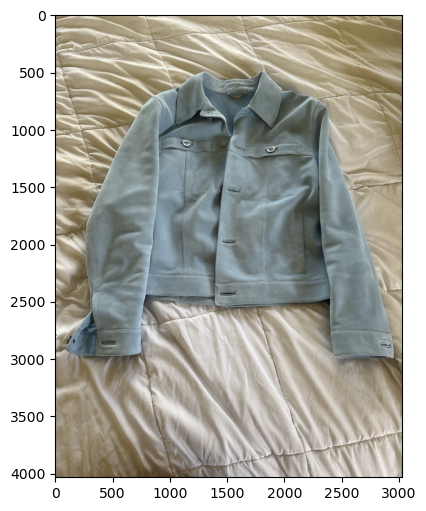

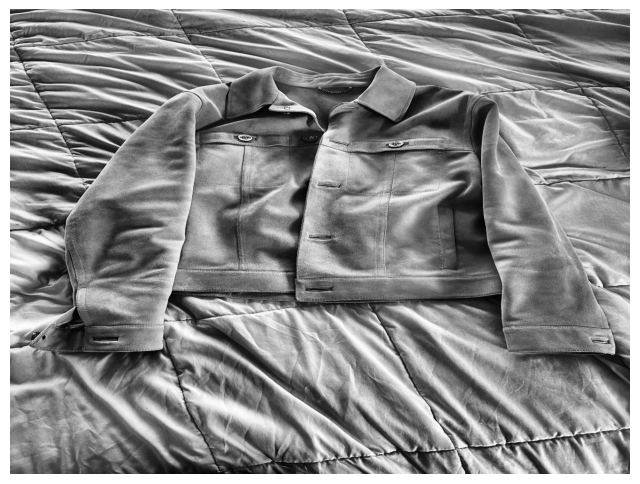

In [70]:
predict_piece('images/blue_jacket.png')

The image object is <class 'numpy.ndarray'>
The pixel values are of type <class 'numpy.uint8'>
Shape of image object = (4032, 3024, 3)
1/1 [==============================] - 3s 3s/step
argmax 124262
This image most likely belongs to [[[ 0  0 77 ... 11 20  0]
  [40 81 77 ... 15 20  0]
  [69 89 77 ... 11  5 68]
  ...
  [64 89  0 ...  0 65  0]
  [65 70  8 ... 72 66  0]
  [65 70  0 ...  0 66  0]]] with a 100.00 percent confidence.


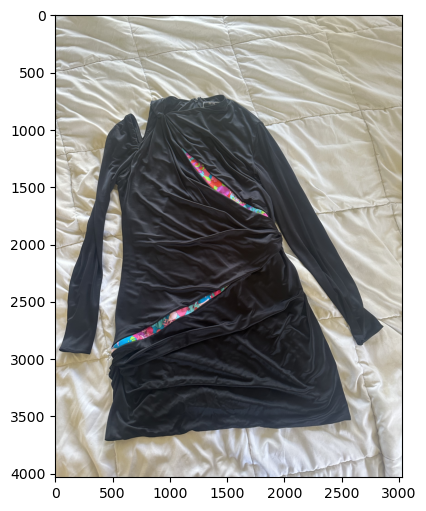

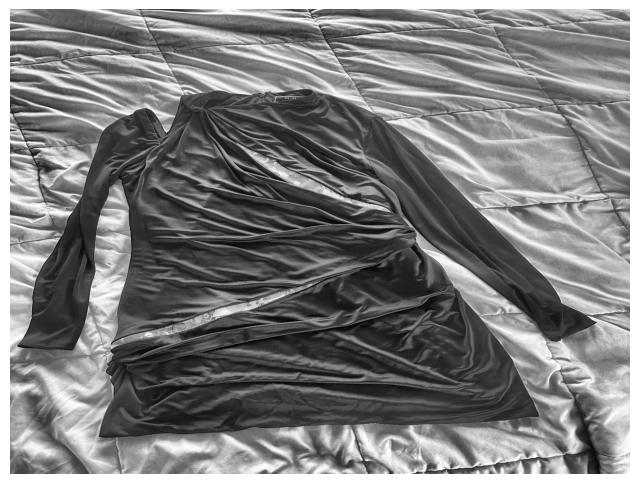

In [71]:
predict_piece('images/black_highlight_dress.png')

The image object is <class 'numpy.ndarray'>
The pixel values are of type <class 'numpy.uint8'>
Shape of image object = (4032, 3024, 3)
1/1 [==============================] - 3s 3s/step
argmax 1379766
This image most likely belongs to [[[28  0  0 ... 28 26  0]
  [45  0 57 ... 68 75  0]
  [44  4  0 ...  0  1  0]
  ...
  [50 89  0 ... 89 75  0]
  [50 89  0 ... 91 47 70]
  [50 89 84 ... 71 71 69]]] with a 100.00 percent confidence.


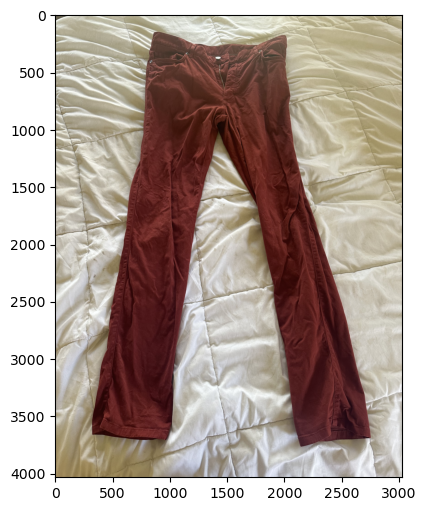

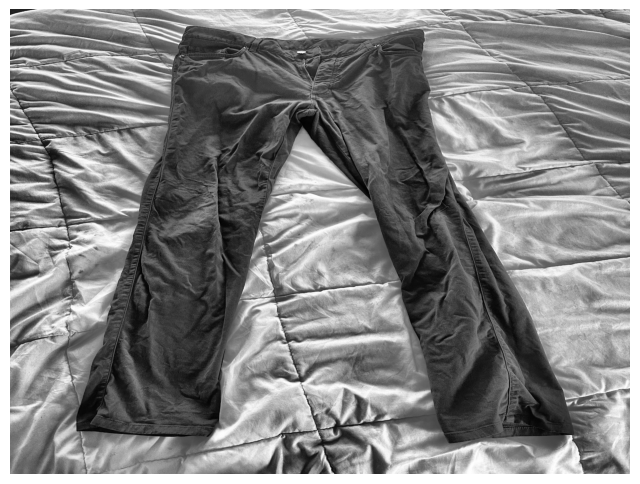

In [72]:
predict_piece('images/red_pants.png')

The image object is <class 'numpy.ndarray'>
The pixel values are of type <class 'numpy.uint8'>
Shape of image object = (4032, 3024, 3)
1/1 [==============================] - 4s 4s/step
argmax 123646
This image most likely belongs to [[[ 0  0 11 ...  0 37  0]
  [36  0 11 ...  0 25  0]
  [36  0 12 ...  0  4  0]
  ...
  [ 7 92  0 ...  0  4  0]
  [21 92  0 ...  0 17  0]
  [ 7 92 22 ... 62  9  0]]] with a 100.00 percent confidence.


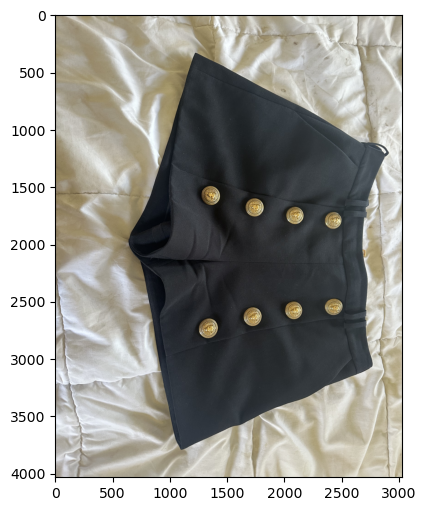

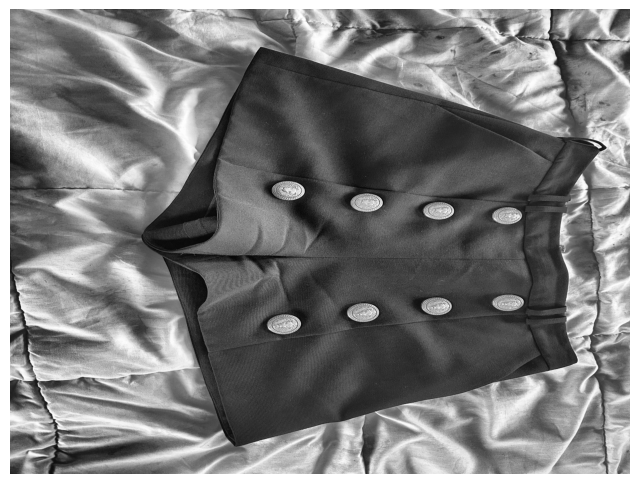

In [74]:
predict_piece('images/button_shorts.png')

The image object is <class 'numpy.ndarray'>
The pixel values are of type <class 'numpy.uint8'>
Shape of image object = (3024, 4032, 3)
1/1 [==============================] - 3s 3s/step
argmax 766
This image most likely belongs to [[[63  0  9 ...  0 36  0]
  [51  0  1 ... 52 36  0]
  [49  0  0 ...  0 37  0]
  ...
  [ 0 25 21 ...  0 35  0]
  [ 0  0 25 ...  0 35  0]
  [ 0 24 21 ...  0 35  0]]] with a 100.00 percent confidence.


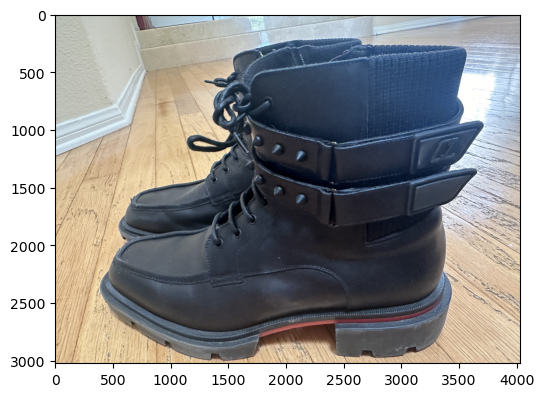

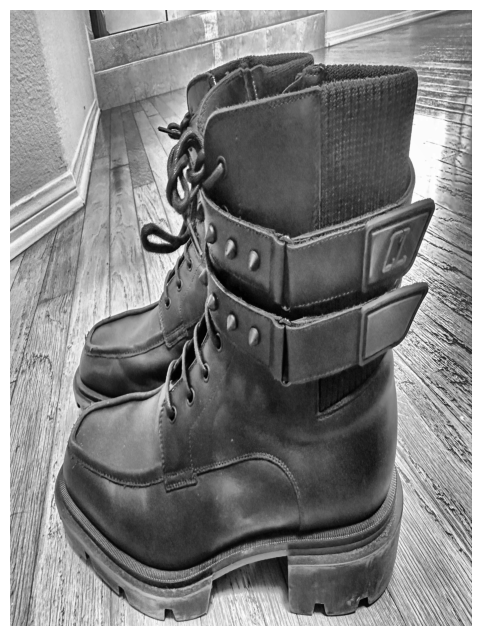

In [75]:
predict_piece('images/combat_boots.png')

The image object is <class 'numpy.ndarray'>
The pixel values are of type <class 'numpy.uint8'>
Shape of image object = (4032, 3024, 3)
1/1 [==============================] - 3s 3s/step
argmax 529766
This image most likely belongs to [[[32 19 58 ... 31 31  0]
  [30 20 75 ... 30 32 31]
  [55 19  0 ... 19 31 32]
  ...
  [80 68  0 ... 34 31 71]
  [64 70  0 ...  0 11  0]
  [37 69  0 ... 20 71  0]]] with a 100.00 percent confidence.


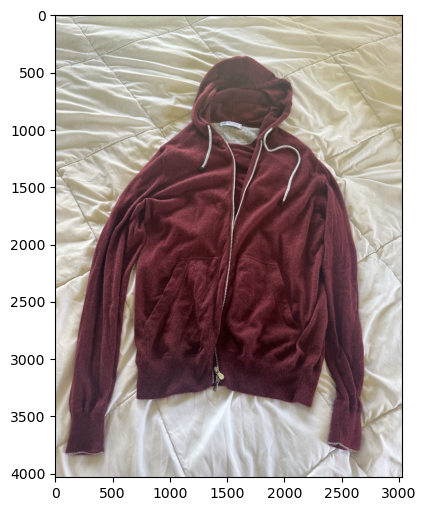

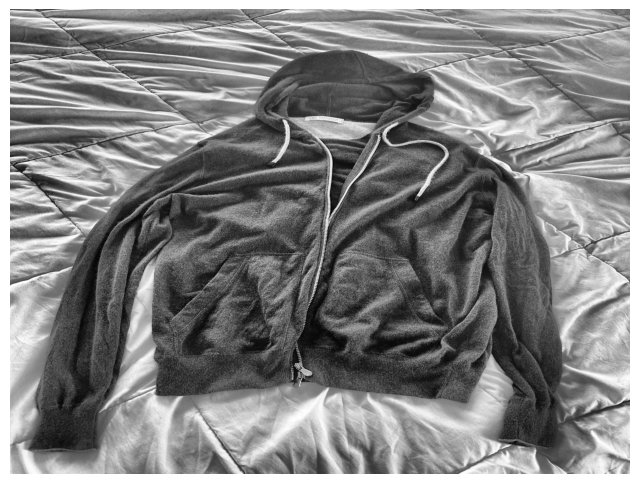

In [76]:
predict_piece('images/vino_hoodie.png')